# Fit bmimpf6 data

EoS: PR

Parameter T dependence: Constant

N (total fitting parameters): 2

## Import Functions

In [1]:
import idaes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

import sys
sys.path.append('../../')

from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)
from pyomo.opt import TerminationCondition, SolverStatus

from idaes.core import FlowsheetBlock
import idaes.logger as idaeslog
# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
# Import unit models from the model library
from idaes.generic_models.unit_models import Flash
# Import degrees of freedom tool
from idaes.core.util.model_statistics import degrees_of_freedom

# parmest (binary_param2)
from bip_fitting_functions import constant

import scipy.stats as stats

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches

## Load Data

In [2]:
data_full = pd.read_csv('r32_bmimpf6_full.csv')
# data_subset = pd.read_csv('r32_emimtf2n_subset.csv')

In [3]:
data_full

,temperature,pressure,x_R32,x_bmimpf6
0,283.2,9800,0.026,0.974
1,283.2,99600,0.106,0.894
2,283.2,249700,0.271,0.729
3,283.2,399600,0.428,0.572
4,283.2,549700,0.558,0.442
5,283.2,699600,0.650,0.350
6,283.2,849500,0.815,0.185
7,298.1,9700,0.018,0.982
8,298.2,99500,0.076,0.924
9,298.2,249700,0.190,0.810


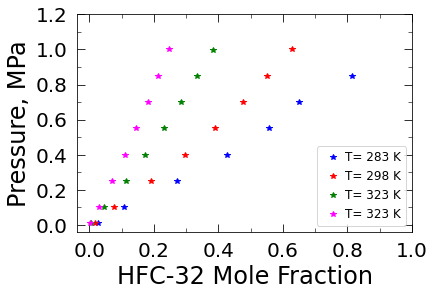

In [5]:
fig, ax = plt.subplots()

ax.plot(data_full["x_R32"][:7],data_full["pressure"][:7]/1e6,"*",color='blue',label="T= 283 K")
ax.plot(data_full["x_R32"][7:15],data_full["pressure"][7:15]/1e6,"*",color='red',label="T= 298 K")
ax.plot(data_full["x_R32"][15:23],data_full["pressure"][15:23]/1e6,"*",color='green',label="T= 323 K")
ax.plot(data_full["x_R32"][23:],data_full["pressure"][23:]/1e6,"*",color='magenta',label="T= 323 K")

# plt.title('Isotherm R32-[emim][TF2N]')
ax.set_ylabel('Pressure, MPa',fontsize=24)
ax.set_xlabel('HFC-32 Mole Fraction',fontsize=24)

ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.1, 0.3, 0.5, 0.7, 0.9],minor=True)
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2])
ax.set_yticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.1],minor=True)

ax.tick_params("both", direction="in", which="both", length=4, labelsize=20, pad=10)
ax.tick_params("both", which="major", length=8)
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

ax.legend(fontsize=12, handletextpad=0.00, loc="lower right")#, bbox_to_anchor=(1, 0.5))
fig.savefig('R32-bmimpf6-data.pdf',bbox_inches='tight')
plt.show()

## Load Configuration + Check DOF

In [6]:
from hfc32_bmimpf6_PR import configuration 

In [7]:
m = ConcreteModel()
m.fs = FlowsheetBlock(default={"dynamic": False})
m.fs.properties = GenericParameterBlock(default=configuration)
m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})
DOF_initial = degrees_of_freedom(m)
print('The initial DOF is {0}'.format(DOF_initial))

The initial DOF is 7


## Fit Parameters

In [9]:
parameters, obj_value, a = constant(data_full, configuration, 'R32', 'bmimpf6', "x_R32", "x_bmimpf6", 
    init_temp =  298.15, init_press =   399400 , init_x_c1 =    0.417, init_x_c2 = 0.583,
    init_kappa_A_2_1 = 0.01, init_kappa_A_1_2 = 0.01, eps = 0.1, scaling_fac = 1e-9 , read=False)

0    9800.0
Name: pressure, dtype: float64
2022-04-20 12:27:32 [INFO] idaes.init.fs.state_block: Starting initialization
2022-04-20 12:27:33 [INFO] idaes.init.fs.state_block: Dew and bubble point initialization: optimal - Optimal Solution Found.
2022-04-20 12:27:33 [INFO] idaes.init.fs.state_block: Equilibrium temperature initialization completed.
2022-04-20 12:27:33 [INFO] idaes.init.fs.state_block: Phase equilibrium initialization: optimal - Optimal Solution Found.
2022-04-20 12:27:33 [INFO] idaes.init.fs.state_block: Property initialization: optimal - Optimal Solution Found.
2022-04-20 12:27:33 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
1    99600.0
Name: pressure, dtype: float64
2022-04-20 12:27:33 [INFO] idaes.init.fs.state_block: Starting initialization
2022-04-20 12:27:33 [INFO] idaes.init.fs.state_block: Dew and bubble point initialization: optimal - Optimal Solution Found.
2022-04-20 12:27:33 [INFO] idaes.init.fs.state_

2022-04-20 12:27:37 [INFO] idaes.init.fs.state_block: Property initialization: optimal - Optimal Solution Found.
2022-04-20 12:27:37 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
12    699500.0
Name: pressure, dtype: float64
2022-04-20 12:27:37 [INFO] idaes.init.fs.state_block: Starting initialization
2022-04-20 12:27:38 [INFO] idaes.init.fs.state_block: Dew and bubble point initialization: optimal - Optimal Solution Found.
2022-04-20 12:27:38 [INFO] idaes.init.fs.state_block: Equilibrium temperature initialization completed.
2022-04-20 12:27:38 [INFO] idaes.init.fs.state_block: Phase equilibrium initialization: optimal - Optimal Solution Found.
2022-04-20 12:27:38 [INFO] idaes.init.fs.state_block: Property initialization: optimal - Optimal Solution Found.
2022-04-20 12:27:38 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
13    850100.0
Name: pressure, dtype: float64
2022-04-20 

2022-04-20 12:27:42 [INFO] idaes.init.fs.state_block: Equilibrium temperature initialization completed.
2022-04-20 12:27:42 [INFO] idaes.init.fs.state_block: Phase equilibrium initialization: optimal - Optimal Solution Found.
2022-04-20 12:27:42 [INFO] idaes.init.fs.state_block: Property initialization: optimal - Optimal Solution Found.
2022-04-20 12:27:42 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
24    99700.0
Name: pressure, dtype: float64
2022-04-20 12:27:42 [INFO] idaes.init.fs.state_block: Starting initialization
2022-04-20 12:27:42 [INFO] idaes.init.fs.state_block: Dew and bubble point initialization: optimal - Optimal Solution Found.
2022-04-20 12:27:42 [INFO] idaes.init.fs.state_block: Equilibrium temperature initialization completed.
2022-04-20 12:27:42 [INFO] idaes.init.fs.state_block: Phase equilibrium initialization: optimal - Optimal Solution Found.
2022-04-20 12:27:43 [INFO] idaes.init.fs.state_block: Property ini

  11  1.0649541e+01 1.14e-02 1.08e+09  -2.5 1.57e+04    -  9.37e-01 8.13e-01f  1
  12  1.0654449e+01 2.65e-03 1.32e+10  -2.5 8.79e+01    -  9.98e-01 7.19e-01h  1
  13  1.0660132e+01 7.47e-05 5.04e+08  -2.5 1.63e+02    -  1.00e+00 9.97e-01h  1
In iteration 13, 31 Slacks too small, adjusting variable bounds
  14  1.0660358e+01 3.19e-07 1.65e+11  -2.5 6.88e+00    -  1.00e+00 9.97e-01h  1
  15  1.0660359e+01 5.25e-12 3.88e-03  -2.5 3.42e-02    -  1.00e+00 1.00e+00h  1
  16  1.0654343e+01 2.13e-07 1.42e+10  -9.0 1.03e+02    -  9.99e-01 9.36e-01F  1
  17  1.0654328e+01 2.64e-10 9.63e+06  -9.0 4.57e-01    -  1.00e+00 9.99e-01h  1
  18  1.0654328e+01 6.95e-12 1.78e-09  -9.0 2.32e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 18

                                   (scaled)                 (unscaled)
Objective...............:   1.0654327798769483e+01    1.0654327798769483e+01
Dual infeasibility......:   1.7753336578607559e-09    1.7753336578607559e-09
Constraint violation....:   6.94

/Users/bridgettebefort/opt/anaconda3/envs/idaes-pse-dev/lib/python3.9/site-packages/pyomo/contrib/interior_point/interface.py:418: RuntimeWarning: divide by zero encountered in true_divide
  data = (duals_primals_lb/(primals - self._nlp.primals_lb()) +


In [10]:
print('Objective (SSE):',obj_value)

Objective (SSE): 10.654327798769483


In [11]:
cov = np.array(a)
print('Covariance Matrix:')
print(cov)

Covariance Matrix:
[[3.78105166e-13 8.34177589e-15]
 [8.34177589e-15 1.03753881e-15]]


In [13]:
np.savetxt('Data/Covariance/PR_Cov_2parameter.csv',cov,delimiter=',')

## Apply Parameters + Plot

In [14]:
solver = SolverFactory('ipopt')
solver.options = {'tol': 1e-6}

In [15]:
m = ConcreteModel()

m.fs = FlowsheetBlock(default={"dynamic": False})

m.fs.properties = GenericParameterBlock(default=configuration)

m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m.fs.F101.inlet.flow_mol.fix(1)
m.fs.F101.inlet.temperature.fix(323.15)
m.fs.F101.inlet.pressure.fix(399800)
m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.5)

m.fs.properties.PR_kappa_A['R32','bmimpf6'] = parameters['fs.properties.PR_kappa_A[R32,bmimpf6]']
m.fs.properties.PR_kappa_A['bmimpf6','R32'] = parameters['fs.properties.PR_kappa_A[bmimpf6,R32]']

# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# Fix the state variables on the state block
# m.fs.F101.inlet.pressure.unfix()
m.fs.F101.inlet.mole_frac_comp[0,'bmimpf6'].unfix()

R32_x = np.zeros((len(data_full)))
P = np.zeros((len(data_full)))

m.fs.liq = Param(mutable=True,default=0.040)
m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "bmimpf6"] == m.fs.liq)

for i in range(len(data_full)):
    m.fs.liq = data_full["x_bmimpf6"].iloc[i]
    m.fs.F101.inlet.temperature.fix(float(data_full["temperature"].iloc[i]))
    m.fs.F101.inlet.pressure.fix(float(data_full["pressure"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(data_full["x_R32"].iloc[i])+0.1)
    m.fs.F101.inlet.mole_frac_comp[0,'bmimpf6'].fix(float(1-(data_full["x_R32"].iloc[i]+0.1)))
    m.fs.F101.vap_outlet.temperature.fix(float(data_full["temperature"].iloc[i]))
    
#     DOF_final = degrees_of_freedom(m)
#     print("The final DOF is {0}".format(DOF_final))
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
    status = solver.solve(m, tee = False)

#     m.fs.F101.report()
    if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):
        print(data_full["x_bmimpf6"].iloc[i])
        R32_x[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32']) 
        P[i] = value(m.fs.F101.vap_outlet.pressure[0])

    else:
        print('Infeasible.')

0.974
0.894
0.729
0.572
0.442
0.35
0.185
0.982
0.924
0.81
0.703
0.61
0.525
0.448
0.372
0.994
0.953
0.887
0.826
0.769
0.715
0.665
0.618
0.997
0.971
0.93
0.891
0.854
0.818
0.786
0.752


In [16]:
fitted_data = pd.DataFrame(data=[R32_x,P/1e6])
fitted_data = fitted_data.T
fitted_data.columns = ['R32_x','P, MPa']
fitted_data.to_csv('Data/Fits/PR_FittedData_2parameter.csv')

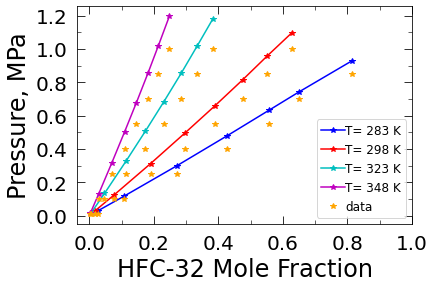

In [17]:
P1= np.zeros((len(P)))

for i in range(len(P)):
    P1[i] = P[i]/1e6

fig, ax = plt.subplots()

ax.plot(R32_x[0:7],P1[0:7],"b*-",label="T= 283 K")  
ax.plot(R32_x[7:15],P1[7:15],"r*-",label="T= 298 K") 
ax.plot(R32_x[15:23],P1[15:23],"c*-",label="T= 323 K") 
ax.plot(R32_x[23:31],P1[23:31],"m-*",label="T= 348 K")
ax.plot(data_full["x_R32"],data_full["pressure"]/1e6,"*",color='orange',label="data")  

# plt.title('Isotherm R32-[emim][TF2N]')
ax.set_ylabel('Pressure, MPa',fontsize=24)
ax.set_xlabel('HFC-32 Mole Fraction',fontsize=24)

ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.1, 0.3, 0.5, 0.7, 0.9],minor=True)
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2])
ax.set_yticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.1],minor=True)

ax.tick_params("both", direction="in", which="both", length=4, labelsize=20, pad=10)
ax.tick_params("both", which="major", length=8)
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

ax.legend(fontsize=12, handletextpad=0.00, loc="lower right")#, bbox_to_anchor=(1, 0.5))
# fig.savefig('R32-bmimpf6-noTdep.pdf',bbox_inches='tight')
plt.show()

### Print Eigvals, Eigvectors of Covariance

An identifiability analysis can be performed with these as well as a FIM because the covariance matrix is the inverse of the FIM. That means that if there are any eigvals >> 0, their eigvecs indicate directions of un-identifiability.

In [18]:
eigvals, eigvecs = np.linalg.eig(cov)

In [19]:
eigvals

array([3.78289619e-13, 8.53085954e-16])

In [20]:
eigvecs

array([[ 0.99975562, -0.02210654],
       [ 0.02210654,  0.99975562]])

In [21]:
np.savetxt('Data/EigenAnalysis/PR_vals_2parameter.csv',eigvals,delimiter=',')
np.savetxt('Data/EigenAnalysis/PR_vecs_2parameter.csv',eigvecs,delimiter=',')

Conclusion: Fully identifiable because all eigvals ~ 0 

## AIC Value

See https://docs.google.com/document/d/1um0r2XK4ldjjy2colOqaZsEM3wIzGD6l_3B8gnpnI2I/edit# for equations

### Calculate MLE

Other AIC - using SSR calculated in above parameter fitting

In [22]:
n=2

In [23]:
SSR_other = obj_value
SSR_other

10.654327798769483

In [24]:
sigma_sq_other = SSR_other/n
sigma_sq_other

5.327163899384741

In [25]:
L_other = -n/2*np.log(2*np.pi) - n/2*np.log(sigma_sq_other) - 1/(2*sigma_sq_other)*SSR_other
L_other

-4.510696061542141

In [26]:
AIC_other = 2*n - 2*L_other
AIC_other

13.021392123084283

In [27]:
AIC_data = pd.DataFrame(data=[n,obj_value,AIC_other])
AIC_data = AIC_data.T
AIC_data.columns = ['n','Objective, Pa^2','AIC']
AIC_data.to_csv('Data/AIC/PR_AIC_2parameter.csv')